<a href="https://colab.research.google.com/github/Swapna-Sarthak/Heart_Disease/blob/main/dmdw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import The Libraries***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

***Loading the dataset***

In [2]:
df = pd.read_csv('/content/heart.csv')

***Exploring the Dataset***

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


***Statistical Measures***

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


***Box-Plot Representation***

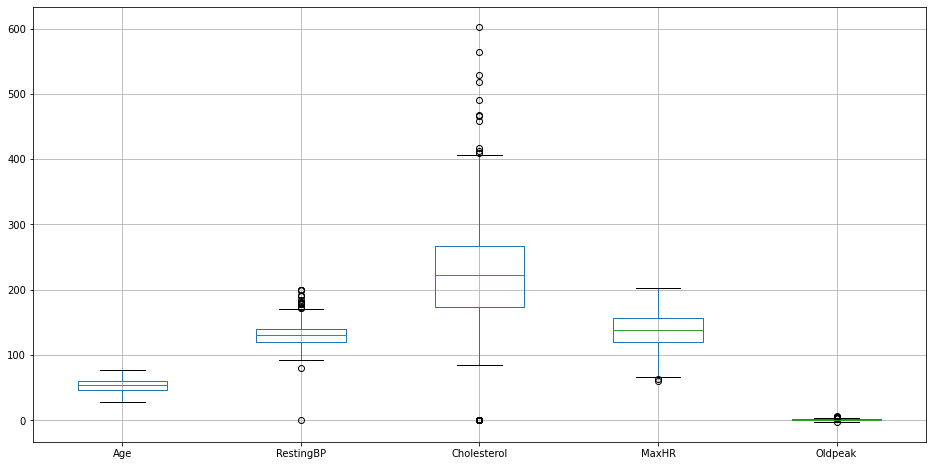

In [8]:
numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numeric].boxplot(figsize= (16,8))
plt.show()

***For oldpeak***

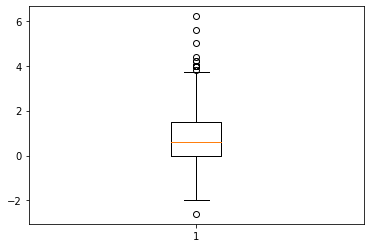

In [9]:
plt.boxplot(df['Oldpeak'])
plt.show()

***Corelation among features***

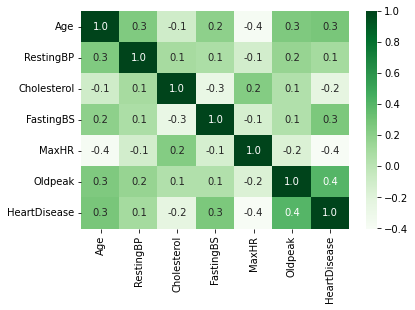

In [10]:
co_rel=df.corr()
sns.heatmap(co_rel,annot=True,fmt=".1f",cmap='Greens')

***Encoding of categorical data to numeric data***

In [11]:
le= LabelEncoder()

In [12]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [13]:
df['Sex']=le.fit_transform(df['Sex'])
df['Sex'].unique()

array([1, 0])

In [14]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ChestPainType'].unique()

array([1, 2, 0, 3])

In [16]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [17]:
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ExerciseAngina'].unique()

array([0, 1])

In [18]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [19]:
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['RestingECG'].unique()

array([1, 2, 0])

In [20]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [21]:
df['ST_Slope']=le.fit_transform(df['ST_Slope'])
df['ST_Slope'].unique()

array([2, 1, 0])

In [22]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [24]:
X= df.drop(labels='HeartDisease', axis=1)
y=df['HeartDisease']
print(X)
print(y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

***Normalization***

In [25]:
scale= StandardScaler()
X_stand = scale.fit_transform(X)
print(X_stand)

[[-1.4331398   0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359 -1.93816322  1.27505906 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854  0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972  0.51595242 -0.81699495 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972 -1.93816322  0.22903206 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563  0.51595242  1.27505906 ... -0.8235563  -0.83243239
   1.05211381]]


***Spliting of testing and training dataset***

In [26]:
x_train,x_test, y_train, y_test = train_test_split(X_stand, y, random_state=42, test_size=0.25)
print(y_train.value_counts())

1    376
0    312
Name: HeartDisease, dtype: int64


***Decision Tree Algorithm***

In [27]:
x_train,x_test, y_train, y_test = train_test_split(X_stand, y, random_state=42, test_size=0.2)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
test_pred2 = dtc.predict(x_test)
train_pred2= dtc.predict(x_train)

In [28]:
print("The accuracy on test data is ", accuracy_score(y_test,test_pred2))
print("The accuracy on train data is ", accuracy_score(y_train,train_pred2))

The accuracy on test data is  0.8043478260869565
The accuracy on train data is  1.0


***K-Nearest Neighbour Algorithm***

In [29]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train , y_train) 
test_pred1=knn.predict(x_test)
train_pred1 = knn.predict(x_train)

In [30]:
print("The accuracy for test data is ",accuracy_score(y_test,test_pred1))
print("The accuracy for train data is ",accuracy_score(y_train,train_pred1))

The accuracy for test data is  0.8478260869565217
The accuracy for train data is  0.8923705722070845


***K-Means Clustering***

In [33]:
kmeans= KMeans(n_clusters=2 ,random_state=42)
kmeans.fit(X)
labels= kmeans.labels_
correct_labs=(sum(y==labels))

In [34]:
print(correct_labs, " out of ",len(y)," matches found.")
print('accuracy score is {0:0.02f}'.format(correct_labs/float(len(y))))

545  out of  918  matches found.
accuracy score is 0.59


***Naive Bayes Algorithm***

In [31]:
x_train,x_test, y_train, y_test = train_test_split(X_stand, y, random_state=42, test_size=0.2)
gnb = GaussianNB()
gnb.fit(x_train,y_train)
train_pred3 = gnb.predict(x_train)
test_pred3 = gnb.predict(x_test)

In [32]:
print("The accuracy on test data is ", accuracy_score(y_test,test_pred3))
print("The accuracy on train data is ", accuracy_score(y_train,train_pred3))

The accuracy on test data is  0.842391304347826
The accuracy on train data is  0.8637602179836512
